<a href="https://colab.research.google.com/github/sujal003-hue/Upgrade-Capstone-Project/blob/main/CreditCardFraudProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **FindDefault (Prediction of Credit Card fraud)**
**Problem Statement:**

A credit card is one of the most used financial products to make online purchases and payments. Though the Credit cards can be a convenient way to manage your finances, they can also be risky. Credit card fraud is the unauthorized use of someone else's credit card or credit card information to make purchases or withdraw cash.
It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.
The dataset contains transactions made by credit cards in September 2013 by European cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.


# **Import Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
import joblib
from tkinter import *

In [ ]:
data = pd.read_csv("/content/creditcard.csv")

# **Display Top 5 Rows of The Dataset**

In [ ]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# **Check Last 5 Rows of The Dataset**

In [ ]:
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


# **Exploratory Data Analysis**

# **Find Shape of Our Dataset (Number of Rows And Numbers of Columns)**

In [ ]:
data.shape

(284807, 31)

In [ ]:
print("Numbers of Rows", data.shape[0])
print("Numbers of Columns", data.shape[1])

Numbers of Rows 284807
Numbers of Columns 31


# **Statistical Measure of Our Dataset**

In [ ]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


# **Get Information About Our Dataset Like Total Numbers of Rows, Columns, Datatype of Each Column And Memory Requirement**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

**From above we can see that only "Class" column is integer.**

# **Data Visualization through Correlation Matrix**

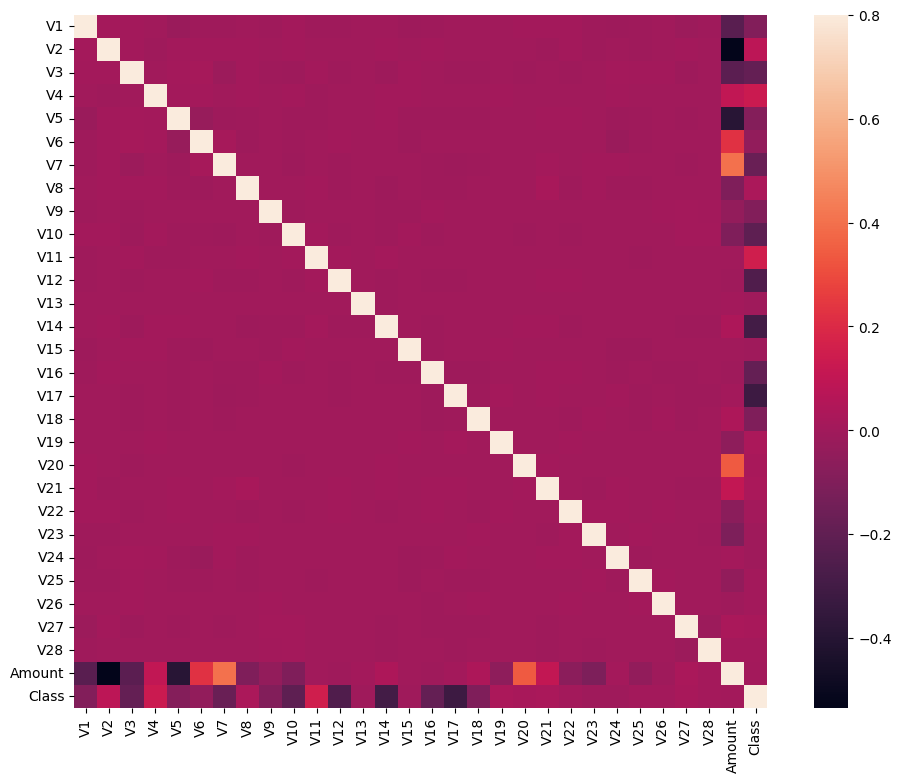

In [ ]:
corrmat = data.corr()
fig = plt.figure(figsize=(12,9))
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

# **Check Null Values In The Dataset**

In [ ]:
data.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


**So, our dataset contains no null values.**

In [ ]:
sc = StandardScaler()
data['Amount']=sc.fit_transform(pd.DataFrame(data['Amount']))

In [ ]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


**We have applied feature scaling in Amount column.**

In [ ]:
data = data.drop(['Time'], axis=1)

In [ ]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


**The 'Time' column is external deciding fator but we does not requried this column for our modeling process so we droping the 'Time' column.**

In [ ]:
data.shape

(284807, 30)

In [ ]:
data.duplicated().any()

True

In [ ]:
data = data.drop_duplicates()

In [ ]:
data.shape

(275663, 30)

In [ ]:
284807-275663

9144

**In our dataset we have 9144 duplicated value.**

# **Not Handiling Imbalanced**

In [ ]:
data['Class'].value_counts()

,count
Class,
0,275190
1,473


# **Store Feature Matrix In X And Response (Target) In Vector y**

In [ ]:
X = data.drop('Class', axis=1)
y = data['Class']

# **Splitting The Dataset Into The Train Set And Test Set**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

# **Handiling Imbalanced Dataset**

In [ ]:
# Undersampling
# Oversampling

# **Undersampling**

In [ ]:
normal = data[data['Class']==0]
fraud = data[data['Class']==1]

In [ ]:
normal.shape

(275190, 30)

In [ ]:
fraud.shape

(473, 30)

In [ ]:
normal_sample=normal.sample(n=473)

In [ ]:
normal_sample.shape

(473, 30)

In [ ]:
new_data = pd.concat([normal_sample, fraud])

In [ ]:
new_data['Class'].value_counts()

,count
Class,
0,473
1,473


In [ ]:
new_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
4029,1.265800,0.511634,0.288014,1.116394,0.252205,-0.323080,0.146480,-0.325537,1.113600,-0.434430,...,-0.228544,-0.323504,-0.148075,-0.483489,0.687883,-0.432904,0.003868,0.017392,-0.273308,0
214669,-0.640583,-0.319619,0.947575,-1.404451,0.501603,-1.170238,1.014343,-0.461653,-1.269916,0.080739,...,-0.535550,-1.162574,0.208745,-0.021633,-0.301393,-0.126174,-0.119883,-0.068936,-0.019589,0
89032,1.308201,-0.062589,0.020006,-0.191792,-0.191760,-0.308121,-0.196046,-0.008349,0.088493,0.063041,...,0.054014,0.157488,-0.180523,-0.421262,0.470153,1.150368,-0.088830,-0.018413,-0.340555,0
25420,-1.034061,-0.089141,2.729714,0.359075,0.192268,0.266184,-0.002642,0.315059,0.306896,-0.460969,...,0.111920,0.379358,-0.012439,0.175014,-0.183588,-0.583476,-0.038157,-0.095029,-0.206300,0
112033,-1.316500,0.241128,0.823152,-3.615115,-0.351094,-1.741018,0.295179,0.445655,1.379629,-2.378043,...,-0.008671,-0.087122,-0.146402,0.515755,0.246419,-1.256999,0.246190,0.057941,-0.329041,0


In [ ]:
X = new_data.drop('Class', axis=1)
y = new_data['Class']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

**Showing the comparision between different matrix after undersampling.**

# **Logistic Regression**

In [ ]:
log = LogisticRegression()
log.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred1 = log.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred1)

0.9992563437505668

In [ ]:
# Accuracy Score of our model after undersampling
accuracy_score(y_test, y_pred1)

0.9368421052631579

In [ ]:
precision_score(y_test, y_pred1)

0.890625

In [ ]:
# Precision Score of our model after undersampling
precision_score(y_test, y_pred1)

0.96875

In [ ]:
recall_score(y_test, y_pred1)

0.6263736263736264

In [ ]:
# Recall Score of our model after undersampling
recall_score(y_test, y_pred1)

0.9117647058823529

In [ ]:
f1_score(y_test, y_pred1)

0.7354838709677419

In [ ]:
# F1 Score of our model after undersampling
f1_score(y_test, y_pred1)

0.9393939393939394

**So, the reason behind using precision_score, recall_score, f1_score is that using only accuracy_score is very dangerous in the imbalanced data. So from above matrix we observed that the accuracy score is high but other matrix have very low score. So futhur we can see the result as precision_score, recall_score, and f1_score is also increased from imbalanced data.**

# **Data Visualization of Confusion Matrix**

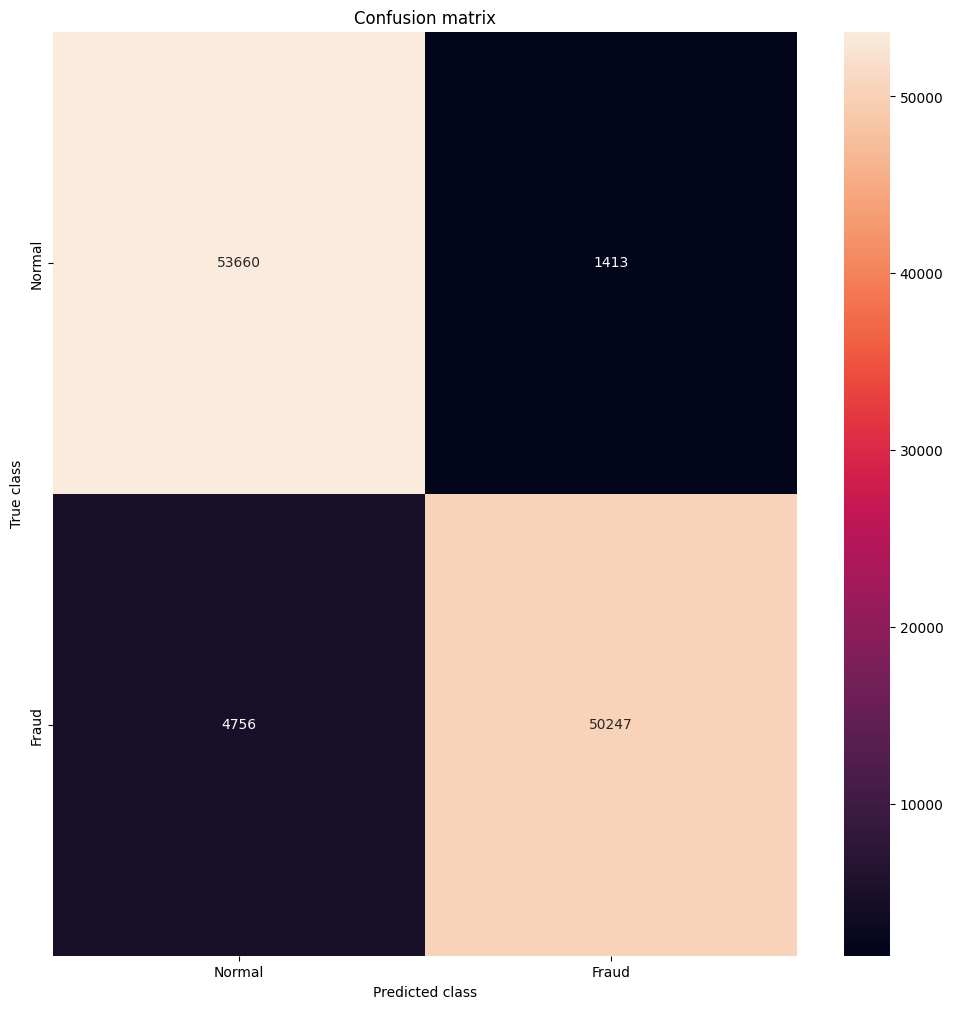

In [ ]:
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(y_test, y_pred1)
plt.figure(figsize =(12, 12))
sns.heatmap(conf_matrix, xticklabels = LABELS,
            yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

**Using Decision Tree Classifier after Undersampling**

# **Decision Tree Classifier**

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred2 = dt.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred2)

0.9210526315789473

In [ ]:
precision_score(y_test, y_pred2)

0.9306930693069307

In [ ]:
recall_score(y_test, y_pred2)

0.9215686274509803

In [ ]:
f1_score(y_test, y_pred2)

0.9261083743842364

**Using Random Forest Classifer for Undersampling.**

# **Random Forest Classifier**

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred3 = rf.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred3)

0.9315789473684211

In [ ]:
precision_score(y_test, y_pred3)

0.978494623655914

In [ ]:
recall_score(y_test, y_pred3)

0.8921568627450981

In [ ]:
f1_score(y_test, y_pred3)

0.9333333333333333

In [ ]:
final_data = pd.DataFrame({'Models': ['LR','DT','RF'],
                           "ACC":[accuracy_score(y_test, y_pred1)*100,
                                  accuracy_score(y_test, y_pred2)*100,
                                  accuracy_score(y_test, y_pred3)*100
                                  ]})

In [ ]:
final_data

,Models,ACC
0,LR,93.684211
1,DT,92.105263
2,RF,93.157895


<Axes: xlabel='Models', ylabel='ACC'>

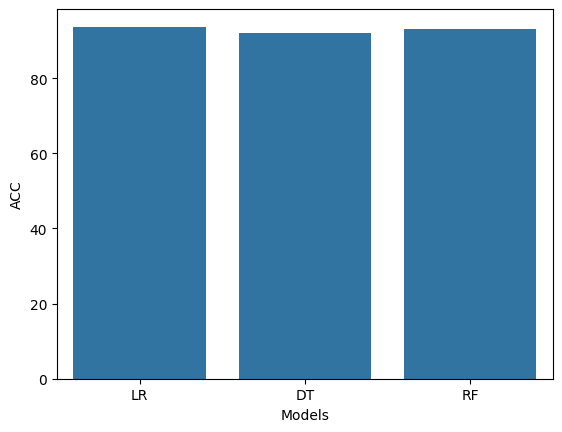

In [ ]:
sns.barplot(x=final_data['Models'], y=final_data['ACC'])

**From above barplot we have see that the 'Logistic Regression' is the best model for Undersampling.**

**By using the Undersampling there is one disadvantage that we have lost lot of data by undersampling so that is the reason why we using Oversampling.**

# **Oversampling**

In [ ]:
X = data.drop('Class', axis=1)
y = data['Class']

In [ ]:
X.shape

(275663, 29)

In [ ]:
y.shape

(275663,)

In [ ]:
X_res,y_res = SMOTE().fit_resample(X,y)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


In [ ]:
y_res.value_counts()

,count
Class,
0,275190
1,275190


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_res,y_res, test_size=0.2, random_state=42)

**Using Logistic Regression after Oversampling.**

# **Logistic Regression**

In [ ]:
log = LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_pred1 = log.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred1)

0.9439569025037247

In [ ]:
precision_score(y_test, y_pred1)

0.9726480836236934

In [ ]:
recall_score(y_test, y_pred1)

0.9135319891642274

In [ ]:
f1_score(y_test, y_pred1)

0.9421636368750176

**Using Decision Tree Classifier after Oversampling.**

# **Decision Tree Classifier**

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred2 = dt.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred2)

0.9983102583669464

In [ ]:
precision_score(y_test, y_pred2)

0.9975854619392553

In [ ]:
recall_score(y_test, y_pred2)

0.9990364161954802

In [ ]:
f1_score(y_test, y_pred2)

0.9983104118598187

**Using Random Forest Classifier after Oversampling.**

# **Random Forest Classifier**

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred3 = rf.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred3)

0.9999454922053854

In [ ]:
precision_score(y_test, y_pred3)

0.9998909269392281

In [ ]:
recall_score(y_test, y_pred3)

1.0

In [ ]:
f1_score(y_test, y_pred3)

0.9999454604952187

In [ ]:
final_data = pd.DataFrame({'Models':['LR','DT','RF'],
                           "ACC":[accuracy_score(y_test,y_pred1)*100,
                                  accuracy_score(y_test,y_pred2)*100,
                                  accuracy_score(y_test,y_pred3)*100
                                  ]})

In [ ]:
final_data

,Models,ACC
0,LR,94.395690
1,DT,99.831026
2,RF,99.994549


<Axes: xlabel='Models', ylabel='ACC'>

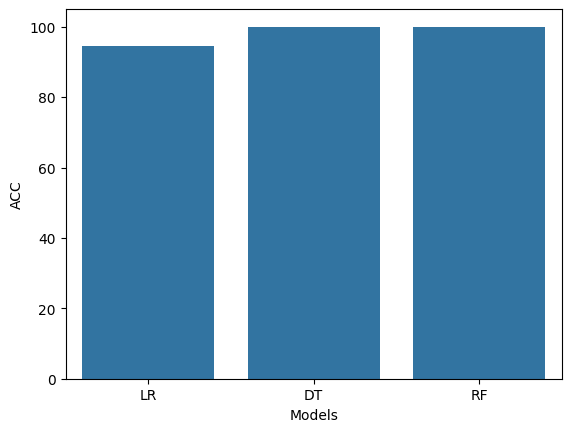

In [ ]:
sns.barplot(x=final_data['Models'], y=final_data['ACC'])

**From above barplot we can see that Random Forest Classifier is the best model for Oversampling.**

Saving the model by using Random Forest Classifier.

# **Save The Model**

In [ ]:
rf1 = RandomForestClassifier()
rf1.fit(X_res,y_res)

RandomForestClassifier()

In [ ]:
joblib.dump(rf1, "credit_card_model")

['credit_card_model']

In [ ]:
model = joblib.load("credit_card_model")

In [ ]:
pred = model.predict([[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]])

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
if pred == 0:
    print("Normal Transaction")
else:
    print("Fruadulent Transaction")

Normal Transaction


# **Conclusion**

*So in our dataset we uses three models ('Logistic Regression', 'Decision Tree Classifier', 'Random Forest Classifier') to trained our credit card fraud dataset. From above three models their performance on credit card fraud dataset is evaluated and have been compared with each other.

*The highly imbalanced dataset is sampled by hybrid apporach and positive class is oversampled and negative class is undersampled, achieving two sets of data distributions.

*The performance of three classifier are examined on two sets of data distributions using accuracy, precision, recall, f1_score.

In [ ]:
def show_entry_fields():
    v1=float(e1.get())
    v2=float(e2.get())
    v3=float(e3.get())
    v4=float(e4.get())
    v5=float(e5.get())
    v6=float(e6.get())

    v7=float(e7.get())
    v8=float(e8.get())
    v9=float(e9.get())
    v10=float(e10.get())
    v11=float(e11.get())
    v12=float(e12.get())

    v13=float(e13.get())
    v14=float(e14.get())
    v15=float(e15.get())
    v16=float(e16.get())
    v17=float(e17.get())
    v18=float(e18.get())

    v19=float(e19.get())
    v20=float(e20.get())
    v21=float(e21.get())
    v22=float(e22.get())
    v23=float(e23.get())
    v24=float(e24.get())

    v25=float(e25.get())
    v26=float(e26.get())
    v27=float(e27.get())
    v28=float(e28.get())
    v29=float(e29.get())

    model = joblib.load('model_credit.pkl')
    y_pred = model.predict([[v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,v29]])
    list1=[v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,v29]

    result = []
if y_pred ==0:
    result.append("Normal Transcation")
else:
    result.append("Fraudulent Transcation")
    print("###############################################")
    print("Credit Card Fraud Detection System", result)
    print("###############################################")

    Label(master, text="Final Prediction from the model - credit card fraud detection").grid(row=31)
    Label(master, text=result).grid(row=32)

    master = Tk()
    master.title("Credit Card Fraud Detection System")

    label = label(master, text="Credit Card Fraud Detection System", bg="black", fg="white", width = 30).grid(row=0, columnspan=2)


    Label(master, text="Enter value of V1").grid(row=1)
    Label(master, text="Enter value of V2").grid(row=2)
    Label(master, text="Enter value of V3").grid(row=3)
    Label(master, text="Enter value of V4").grid(row=4)
    Label(master, text="Enter value of V5").grid(row=5)
    Label(master, text="Enter value of V6").grid(row=6)

    Label(master, text="Enter value of V7").grid(row=7)
    Label(master, text="Enter value of V8").grid(row=8)
    Label(master, text="Enter value of V9").grid(row=9)
    Label(master, text="Enter value of V10").grid(row=10)
    Label(master, text="Enter value of V11").grid(row=11)
    Label(master, text="Enter value of V12").grid(row=12)

    Label(master, text="Enter value of V13").grid(row=13)
    Label(master, text="Enter value of V14").grid(row=14)
    Label(master, text="Enter value of V15").grid(row=15)
    Label(master, text="Enter value of V16").grid(row=16)
    Label(master, text="Enter value of V17").grid(row=17)
    Label(master, text="Enter value of V18").grid(row=18)

    Label(master, text="Enter value of V19").grid(row=19)
    Label(master, text="Enter value of V20").grid(row=20)
    Label(master, text="Enter value of V21").grid(row=21)
    Label(master, text="Enter value of V22").grid(row=22)
    Label(master, text="Enter value of V23").grid(row=23)
    Label(master, text="Enter value of V24").grid(row=24)

    Label(master, text="Enter value of V25").grid(row=25)
    Label(master, text="Enter value of V26").grid(row=26)
    Label(master, text="Enter value of V27").grid(row=27)
    Label(master, text="Enter value of V28").grid(row=28)
    Label(master, text="Enter value of V29").grid(row=29)

    e1 = Entry(master)
    e2 = Entry(master)
    e3 = Entry(master)
    e4 = Entry(master)
    e5 = Entry(master)
    e6 = Entry(master)

    e7 = Entry(master)
    e8 = Entry(master)
    e9 = Entry(master)
    e10 = Entry(master)
    e11 = Entry(master)
    e12 = Entry(master)

    e13 = Entry(master)
    e14 = Entry(master)
    e15 = Entry(master)
    e16 = Entry(master)
    e17 = Entry(master)
    e18 = Entry(master)

    e19 = Entry(master)
    e20 = Entry(master)
    e21 = Entry(master)
    e22 = Entry(master)
    e23 = Entry(master)
    e24 = Entry(master)

    e25 = Entry(master)
    e26 = Entry(master)
    e27 = Entry(master)
    e28 = Entry(master)
    e29 = Entry(master)

    e1.grid(row=1, column=1)
    e2.grid(row=2, column=1)
    e3.grid(row3, column=1)
    e4.grid(row=4, column=1)
    e5.grid(row=5, column=1)
    e6.grid(row=6, column=1)

    e7.grid(row=7, column=1)
    e8.grid(row=8, column=1)
    e9.grid(row=9, column=1)
    e10.grid(row=10, column=1)
    e11.grid(row=11, column=1)
    e12.grid(row=12, column=1)

    e13.grid(row=13, column=1)
    e14.grid(row=14, column=1)
    e15.grid(row=15, column=1)
    e16.grid(row=16, column=1)
    e17.grid(row=17, column=1)
    e18.grid(row=18, column=1)

    e19.grid(row=19, column=1)
    e20.grid(row=20, column=1)
    e21.grid(row=21, column=1)
    e22.grid(row=22, column=1)
    e23.grid(row=23, column=1)
    e24.grid(row=24, column=1)

    e25.grid(row=25, column=1)
    e26.grid(row=26, column=1)
    e27.grid(row=27, column=1)
    e28.grid(row=28, column=1)
    e29.grid(row=29, column=1)

    Button(master, text='Predict', command=show_entry_fields).grid(row=30, column=1)

    mainloop()





